In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Decision Tree (Classification) 

In [9]:
df = pd.read_csv("Social_Network_Ads.csv")
df = pd.DataFrame(df)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [11]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

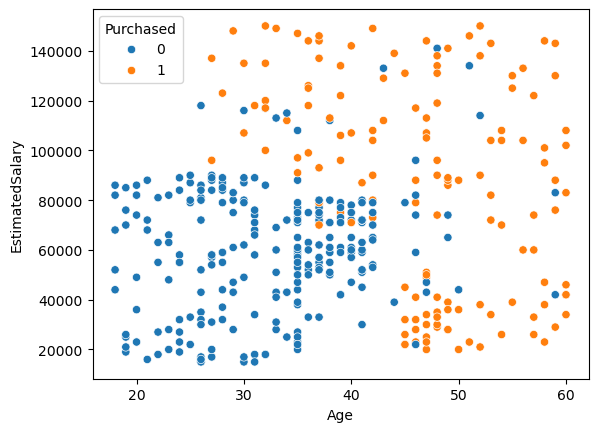

In [19]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=df,hue="Purchased")
plt.show()
# It is clealy not linear so we use non-linear algorithms

In [23]:
x = df.iloc[:,:-1]
y = df["Purchased"]

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
from sklearn.tree import DecisionTreeClassifier

### Gini (Default)

In [43]:
gn = DecisionTreeClassifier()
gn.fit(x_train,y_train)

DecisionTreeClassifier()

### If the difference between the scores of training and testing data is high then the model is overfitted
         

#### Then we use Pruning Methods (Pre,Post)

In [80]:
gn.score(x_test,y_test)*100, gn.score(x_train,y_train)*100

(83.75, 99.6875)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


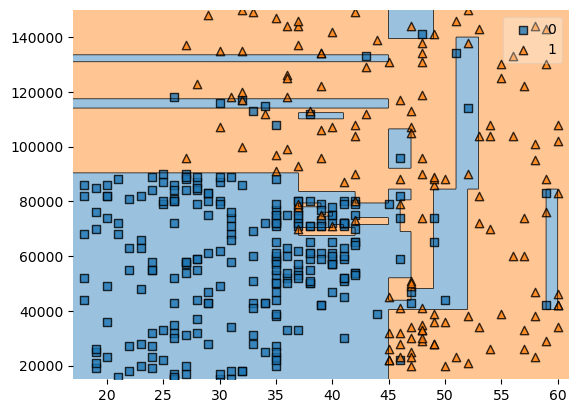

In [47]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf = gn)
plt.show()

In [69]:
from sklearn.tree import plot_tree

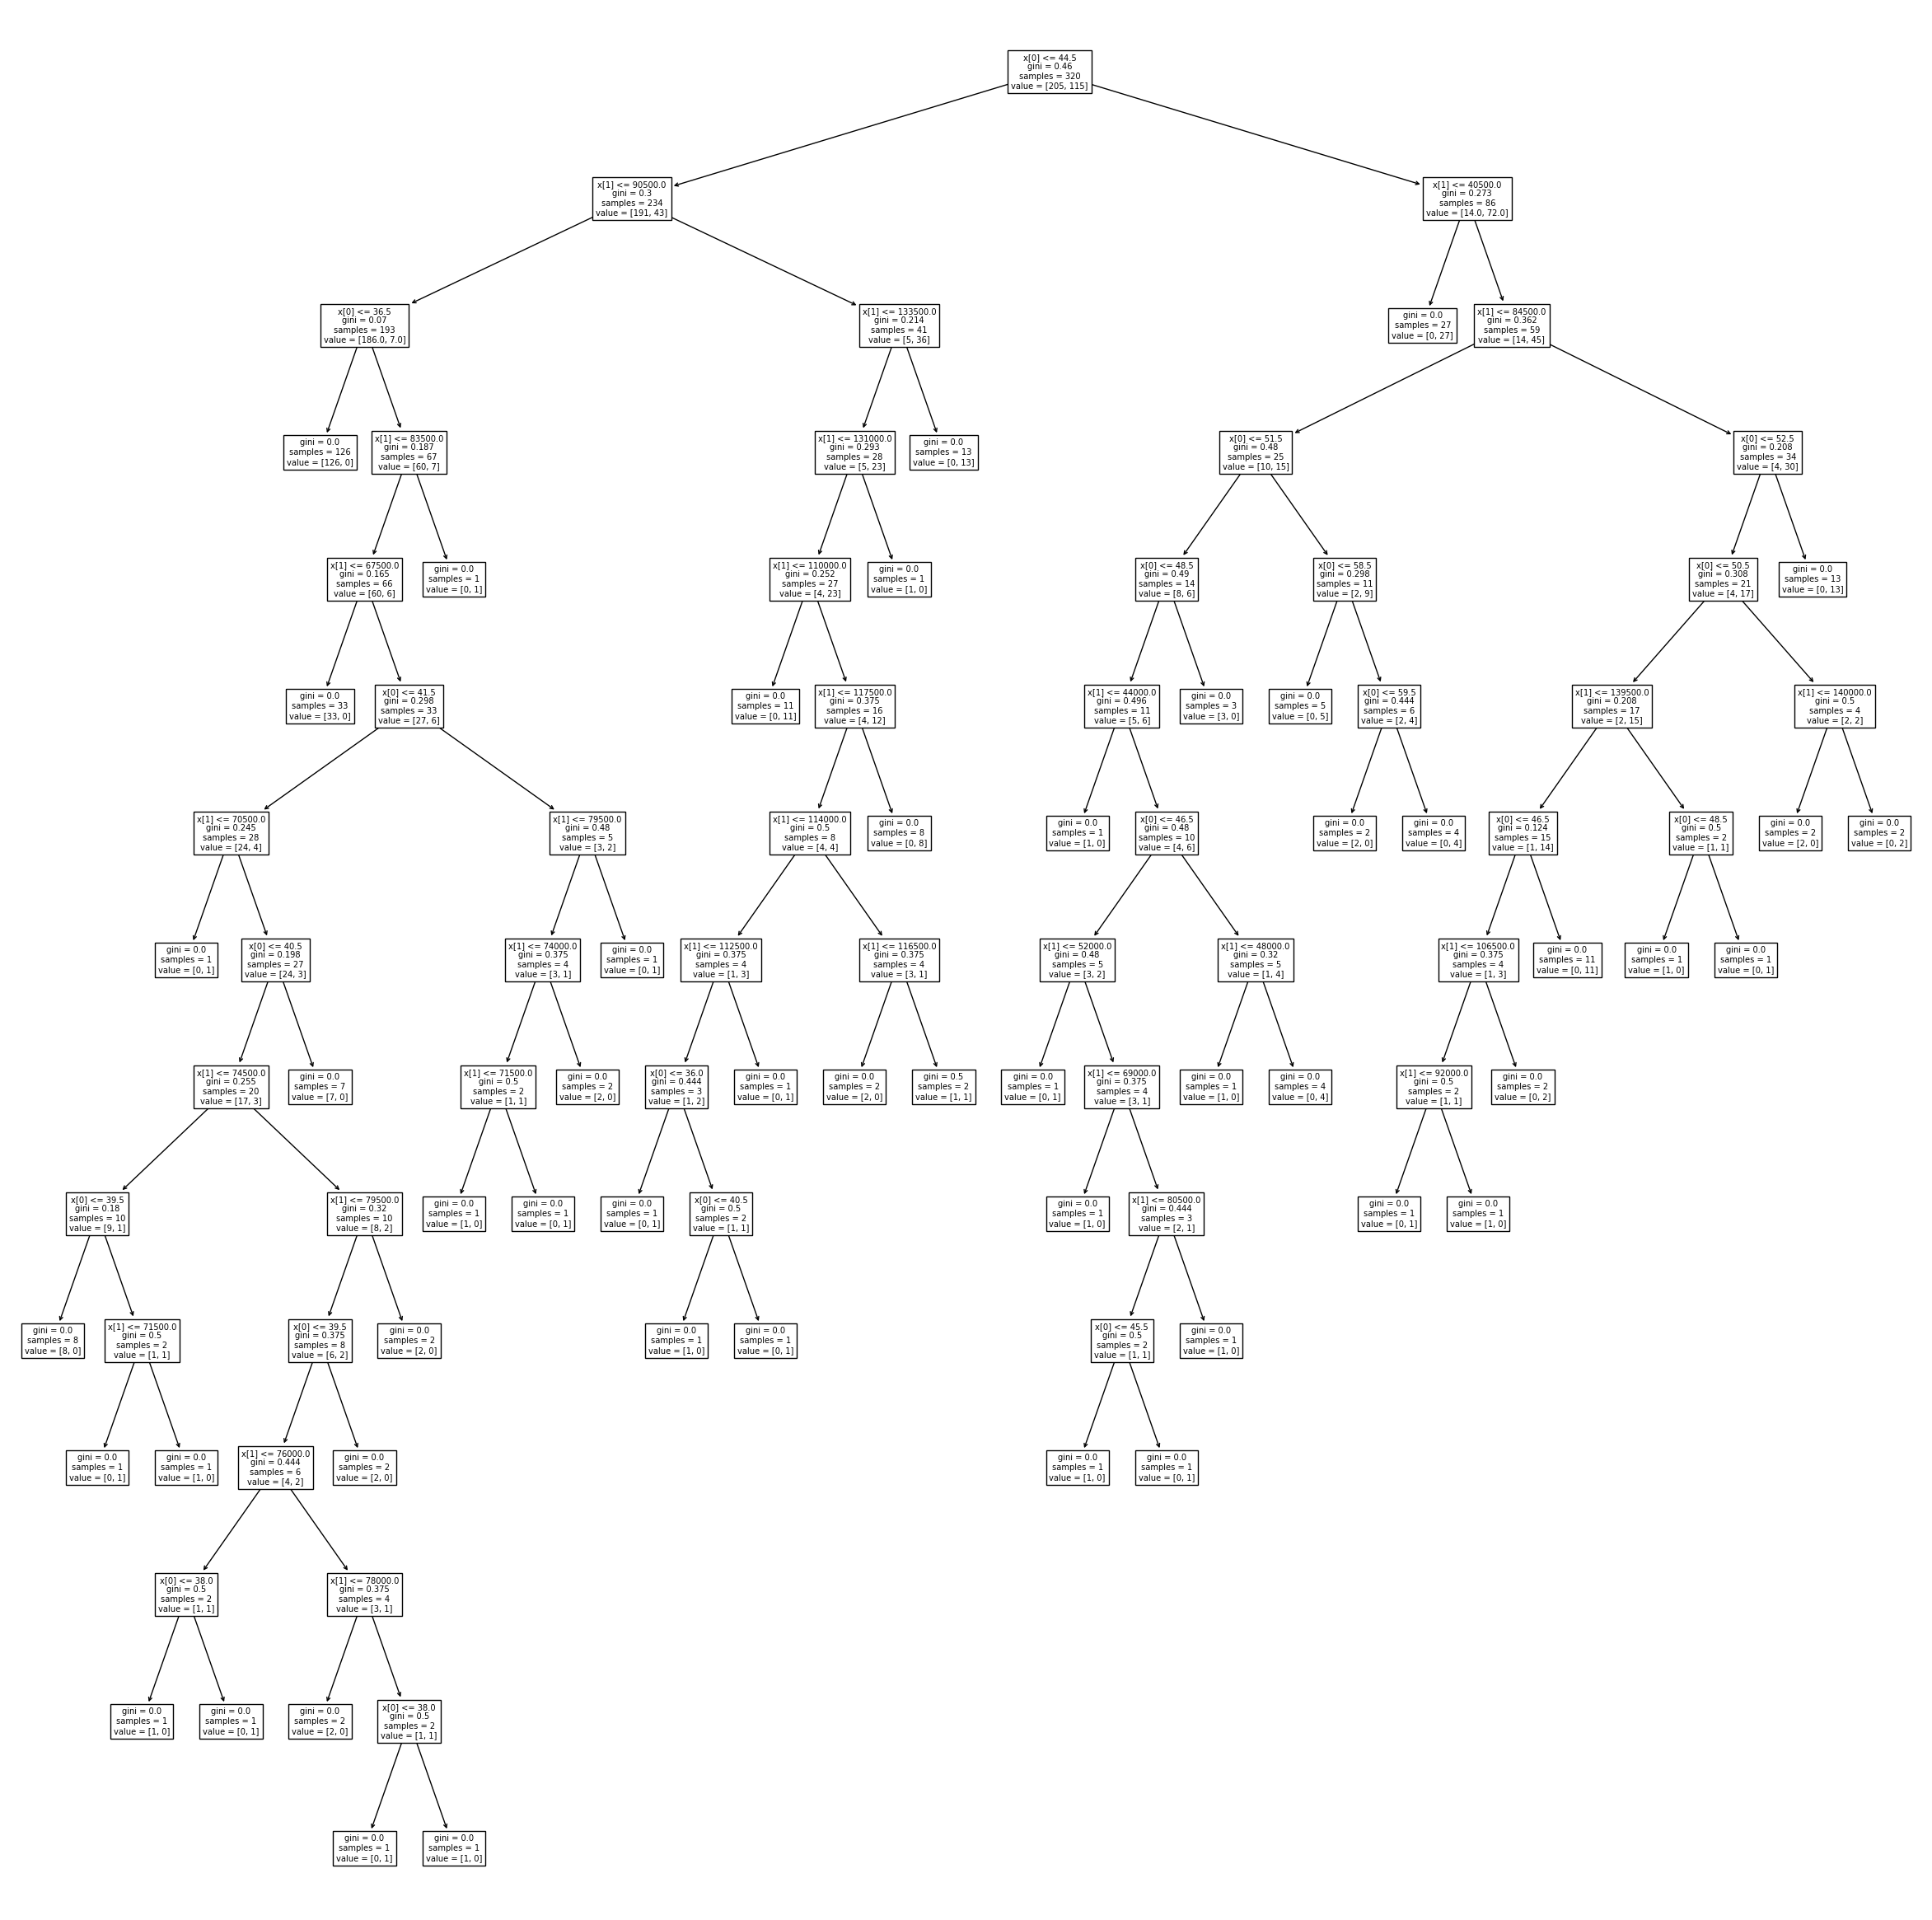

In [65]:
plt.figure(figsize =(30,30))
plot_tree(gn)
plt.savefig("gn.jpg")
plt.show()

### Entropy and Pre-Pruning

#### max_depth is used to do pruning

In [121]:
en = DecisionTreeClassifier(max_depth=2,criterion='entropy')
en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

#### If the difference between the scores of training and testing data is high then the model is overfitted

In [124]:
en.score(x_test,y_test)*100 , en.score(x_train,y_train)*100

(91.25, 91.875)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


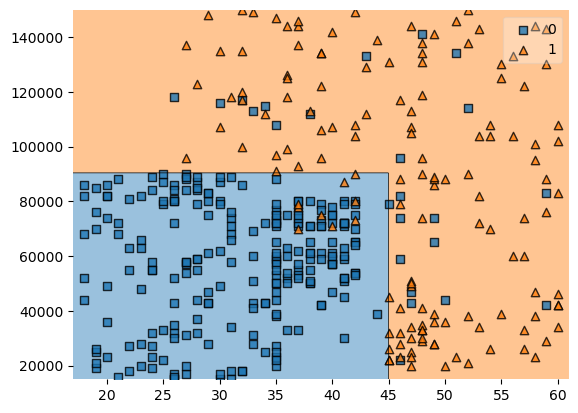

In [126]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf = en)
plt.show()

In [128]:
from sklearn.tree import plot_tree

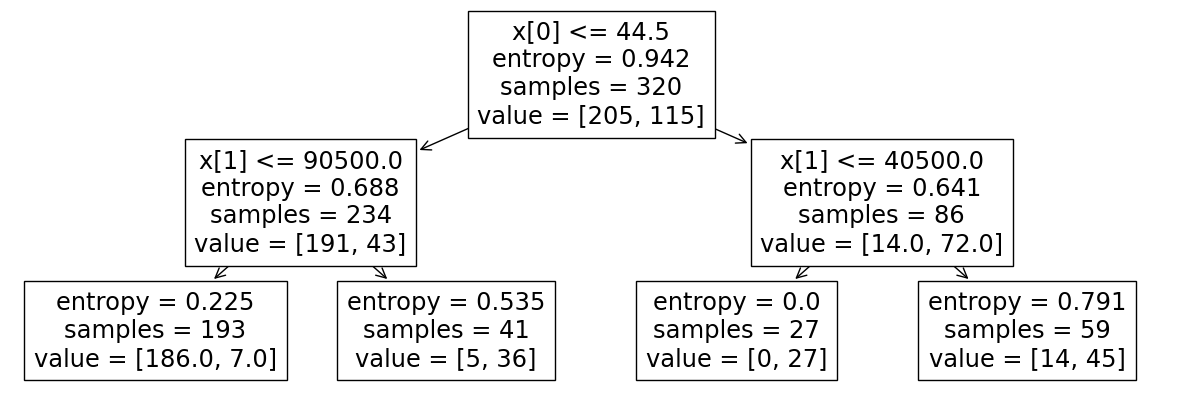

In [140]:
plt.figure(figsize =(15,5))
plot_tree(en)
plt.show()

### Post Pruning

In [118]:
for i in range(1,20) :
    gn1 = DecisionTreeClassifier(max_depth=i)
    gn1.fit(x_train,y_train)
    print(gn1.score(x_train,y_train)*100,gn1.score(x_test,y_test)*100,i)

# from this we can say that it is suggestred to use 2 or 3 as your max_depth as the difference is less
# We can use 4 and 5 also as there is not much difference

82.1875 90.0 1
91.875 91.25 2
91.875 91.25 3
93.125 91.25 4
93.4375 90.0 5
95.0 86.25 6
96.875 85.0 7
97.5 85.0 8
98.125 85.0 9
98.4375 85.0 10
99.0625 83.75 11
99.0625 83.75 12
99.6875 83.75 13
99.6875 83.75 14
99.6875 83.75 15
99.6875 83.75 16
99.6875 83.75 17
99.6875 83.75 18
99.6875 83.75 19


# Decision Tree (Regression)

In [145]:
df1 = pd.read_csv("Salary_Data.csv")
df1.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [147]:
df1.isnull().sum()

Age                    2
Years of Experience    3
Salary                 5
dtype: int64

In [149]:
df1.columns

Index(['Age', 'Years of Experience', 'Salary'], dtype='object')

In [153]:
df1["Age"] = df1["Age"].fillna(df1["Age"].mean())

In [155]:
df1["Years of Experience"] = df1["Years of Experience"].fillna(df1["Years of Experience"].mean())

In [157]:
df1["Salary"] = df1["Salary"].fillna(df1["Salary"].mean())

In [159]:
df1.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

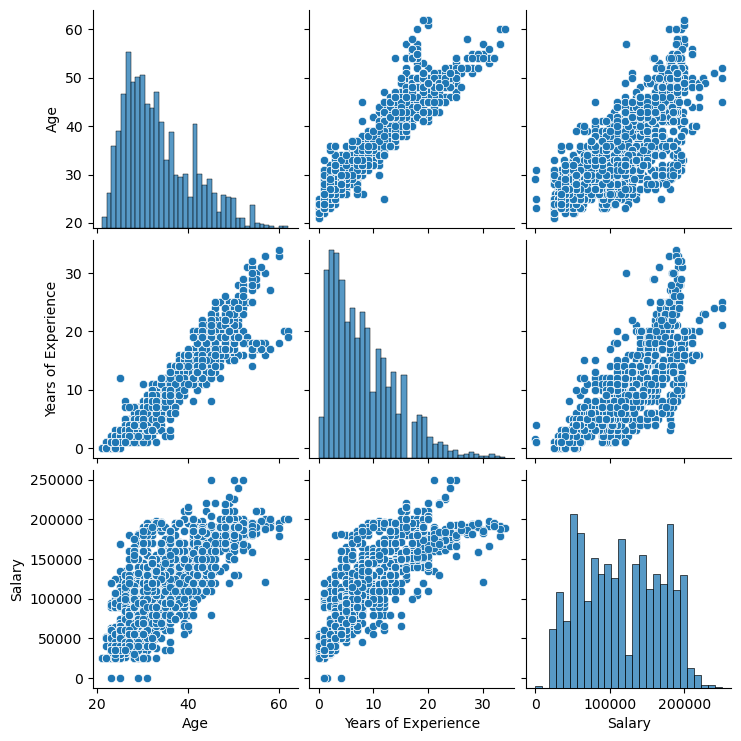

In [161]:
sns.pairplot(data = df1)
plt.show()

In [163]:
x = df1.iloc[:,:-1]
y = df1["Salary"]

In [165]:
from sklearn.model_selection import train_test_split

In [167]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [169]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [171]:
dt = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [173]:
dt.score(xtest,ytest)*100 , dt.score(xtrain,ytrain)*100

(84.14570486535126, 85.4400550919533)

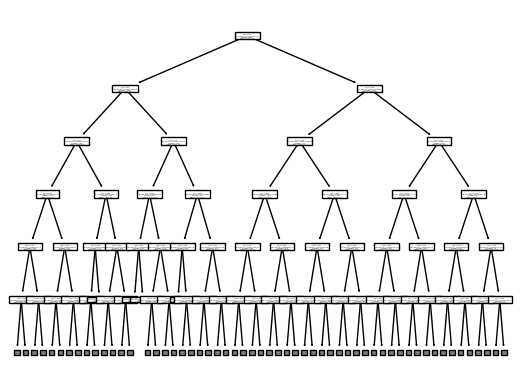

In [178]:
plot_tree(dt,max_depth=5)
plt.show()

# K-Nearest Neighbour (Classification)

In [182]:
df2 = pd.read_csv("Social_Network_Ads.csv")
df2.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [184]:
df2.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

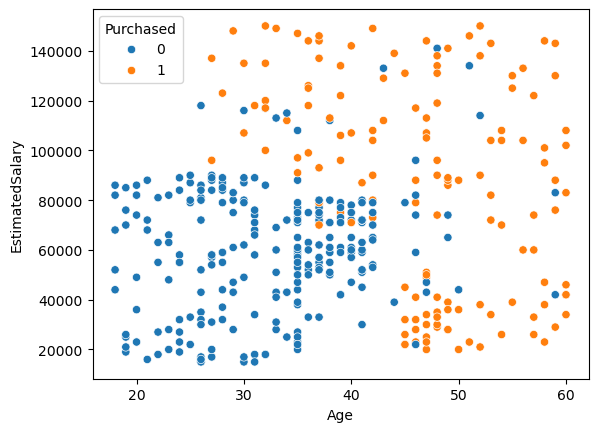

In [188]:
sns.scatterplot(x = "Age",y ="EstimatedSalary",data = df2,hue = "Purchased")
plt.show()

In [190]:
x = df2.iloc[:,:-1]
y = df2["Purchased"]

In [192]:
from sklearn.preprocessing import StandardScaler

In [198]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [200]:
from sklearn.model_selection import train_test_split

In [202]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [204]:
from sklearn.neighbors import KNeighborsClassifier

#### We can use Manhattan distance (or) Enclidean Distance to find the nearest neibour by changing P value in KNeighborsClassifier()

In [214]:
kc = KNeighborsClassifier(n_neighbors=3)
kc.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [216]:
kc.score(xtest,ytest)*100 , kc.score(xtrain,ytrain)*100

(91.25, 92.5)

#### We checked for the best fit of the model

In [218]:
for i in range(1,30) :
    kc1 = KNeighborsClassifier(n_neighbors=i)
    kc1.fit(xtrain,ytrain)
    print(i,kc1.score(xtrain,ytrain)*100,kc1.score(xtest,ytest)*100)

1 99.6875 85.0
2 91.5625 86.25
3 92.5 91.25
4 91.875 92.5
5 90.9375 92.5
6 90.9375 90.0
7 91.875 93.75
8 90.625 92.5
9 91.25 93.75
10 90.625 92.5
11 90.9375 92.5
12 91.25 92.5
13 91.5625 92.5
14 90.625 92.5
15 90.625 92.5
16 90.0 92.5
17 90.625 92.5
18 90.0 92.5
19 90.9375 92.5
20 90.0 93.75
21 90.3125 92.5
22 90.0 93.75
23 90.3125 93.75
24 89.375 93.75
25 90.0 93.75
26 89.375 93.75
27 89.375 92.5
28 88.75 93.75
29 88.75 93.75


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


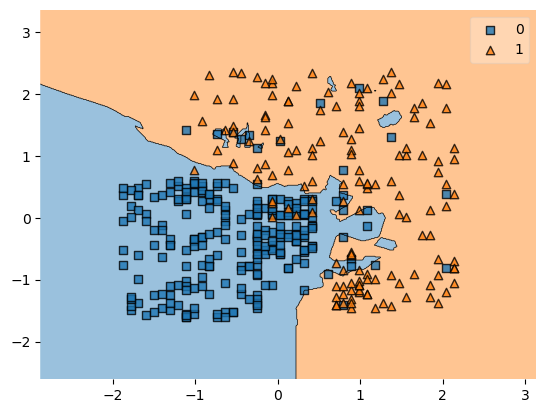

In [221]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf = kc)
plt.show()

In [223]:
x , y

(          Age  EstimatedSalary
 0   -1.781797        -1.490046
 1   -0.253587        -1.460681
 2   -1.113206        -0.785290
 3   -1.017692        -0.374182
 4   -1.781797         0.183751
 ..        ...              ...
 395  0.797057        -0.844019
 396  1.274623        -1.372587
 397  1.179110        -1.460681
 398 -0.158074        -1.078938
 399  1.083596        -0.990844
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [225]:
kc.predict([[-1.781797,-1.490046]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

#### The Model predictions are almost correct so it is a good model

In [227]:
kc.predict([[1.083596,-0.990844]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [230]:
kc.predict([[1.179110,-1.460681]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# K-Nearest Neighbour (Regression)

In [238]:
df3 = pd.read_csv("Salary_Data.csv")
df3.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [242]:
df3["Age"] = df3["Age"].fillna(df3["Age"].mean())

In [244]:
df3["Years of Experience"] = df3["Years of Experience"].fillna(df3["Years of Experience"].mean())

In [246]:
df3["Salary"] = df3["Salary"].fillna(df3["Salary"].mean())

In [250]:
x = df3.iloc[:,:-1]
y = df3["Salary"]

In [252]:
from sklearn.model_selection import train_test_split

In [254]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [256]:
from sklearn.neighbors import KNeighborsRegressor

In [264]:
kr = KNeighborsRegressor(n_neighbors=29)
kr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=29)

In [266]:
kr.score(x_test,y_test)*100 , kr.score(x_train,y_train)*100

(83.29135865677661, 83.89238395397504)

In [262]:
for i in range(1,30) :
    kr1 = KNeighborsRegressor(n_neighbors=i)
    kr1.fit(x_train,y_train)
    print(i,kr1.score(x_train,y_train)*100,kr1.score(x_test,y_test)*100)

1 68.75621843161473 67.02231822929612
2 76.7527949981634 74.45824552158031
3 78.9502087247904 75.92046114956005
4 81.17900810184567 78.36829775293448
5 81.90118418621701 79.20251912817523
6 82.36340651428374 79.894388865465
7 83.322293801684 81.1821654604315
8 83.6207157014137 81.78481259579671
9 83.73359058517913 82.01639852999779
10 83.78879996640698 82.37056800010893
11 83.75711572078829 82.40646516825379
12 83.83249418476379 82.45258748123511
13 83.80591731735704 82.44923354974264
14 83.85740437081559 82.63003765093974
15 83.82526807222474 82.75581897933651
16 83.83095395649111 82.97429978506875
17 83.96078741885349 83.14004693910907
18 83.88491204650322 83.08074438377224
19 83.83630236966783 82.99839748313181
20 83.88370417934075 83.06402304031113
21 83.95868414686785 83.13509810597512
22 83.94043876443011 83.16870423194116
23 83.93253395984568 83.22138586668419
24 83.92558843242715 83.2345912816928
25 83.89459055156479 83.24561074428874
26 83.81872267327589 83.23938744128768
27 8

# Support Vector Machine (SVM) (Classification)

In [293]:
df4 = pd.read_csv("students_placement.csv")
df4.head()

,cgpa,iq,profile_score,placed,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,5.97,106,61,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.83,113,77,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.60,110,61,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.54,113,68,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.84,102,67,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
df4.dropna(axis = 1, how = "all",inplace = True)

In [297]:
df4.drop(columns = ["Unnamed: 10","iq"],inplace = True)

In [299]:
df4.head()

,cgpa,profile_score,placed
0,5.97,61,0
1,6.83,77,0
2,6.60,61,0
3,5.54,68,0
4,6.84,67,0


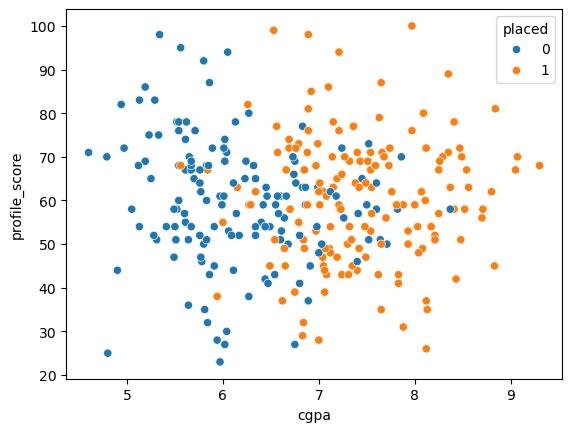

In [301]:
sns.scatterplot(x="cgpa",y="profile_score",data= df4,hue = "placed")
plt.show()

In [304]:
x = df4.iloc[:,:-1]
y = df4["placed"]

In [340]:
x,y

(     cgpa  profile_score
 0    5.97             61
 1    6.83             77
 2    6.60             61
 3    5.54             68
 4    6.84             67
 ..    ...            ...
 295  6.44             54
 296  6.09             52
 297  7.68             70
 298  7.00             28
 299  4.79             70
 
 [300 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 295    0
 296    0
 297    1
 298    1
 299    0
 Name: placed, Length: 300, dtype: int64)

In [306]:
from sklearn.model_selection import train_test_split

In [308]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [310]:
from sklearn.svm import SVC

####  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} Use different kernal based on the dataset

In [370]:
svc = SVC(kernel='linear')
svc.fit(xtrain,ytrain)

SVC(kernel='linear')

In [372]:
svc.score(xtest,ytest)*100 , svc.score(xtrain,ytrain)*100

(83.33333333333334, 82.08333333333333)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


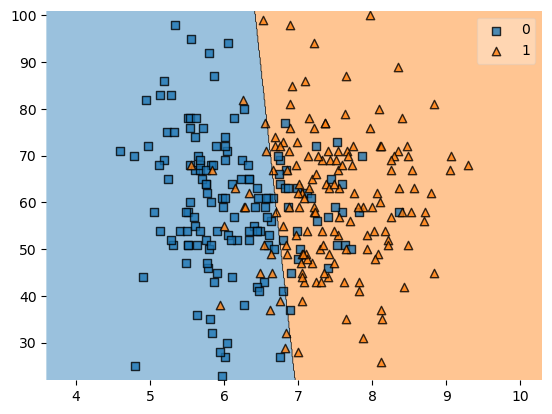

In [374]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=svc)
plt.show()

In [376]:
svc.predict([[7.00,28]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#### The Model is working better , but it can be made better

In [378]:
svc.predict([[4.79,70]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# SVM (Regression)

In [392]:
df5 = pd.read_csv("placement1.csv")
df5.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


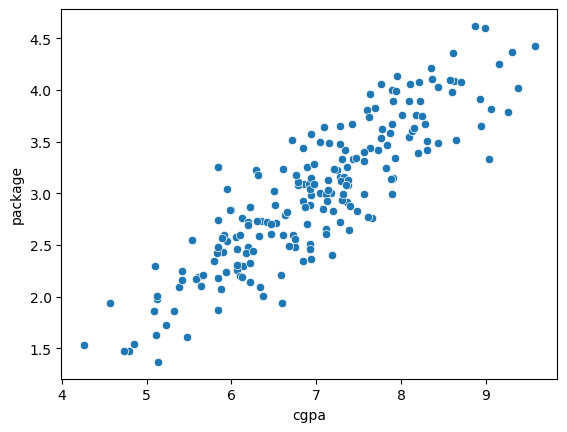

In [398]:
sns.scatterplot(x= "cgpa",y = "package",data = df5)
plt.show()

In [401]:
x = df5[["cgpa"]]
y = df5["package"]

In [403]:
from sklearn.model_selection import train_test_split

In [405]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [407]:
from sklearn.svm import SVR

####  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} Use different kernal based on the dataset

In [436]:
svr = SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [438]:
svr.score(x_test,y_test)*100 , svr.score(x_train,y_train)*100

(77.06668029575103, 77.45351616879739)

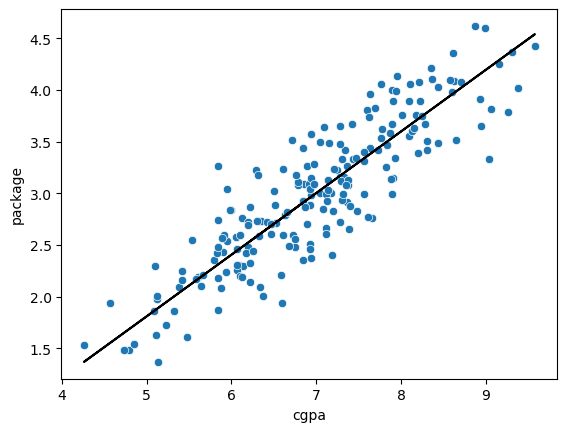

In [440]:
sns.scatterplot(x= "cgpa",y = "package",data = df5)
plt.plot(df5["cgpa"],svr.predict(x),color = "black")
plt.show()

In [444]:
svr.predict([[7.42]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([3.2523109])

# Hyperparameter Tuning (GridSearchCV , RandomizedSearchCV)

In [449]:
df6 = pd.read_csv("polynomial_classification.csv")
df6.head()

,Temperature,Ice_Cream_Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [453]:
df6.columns

Index(['Temperature', 'Ice_Cream_Sales'], dtype='object')

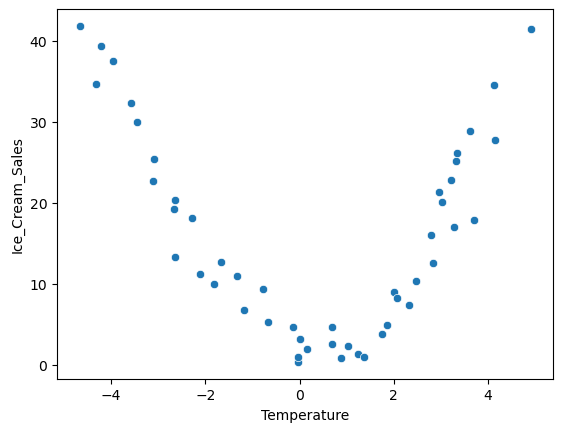

In [455]:
sns.scatterplot(x ="Temperature",y = "Ice_Cream_Sales",data = df6)
plt.show()

In [457]:
x = df6.iloc[:,:-1]
y = df6["Ice_Cream_Sales"]

In [464]:
from sklearn.model_selection import train_test_split

In [466]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [468]:
from sklearn.tree import DecisionTreeRegressor

In [528]:
dtr = DecisionTreeRegressor(criterion = 'poisson', max_depth = 5, splitter = 'best')
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='poisson', max_depth=5)

In [530]:
dtr.score(xtrain,ytrain)*100 , dtr.score(xtest,ytest)*100

(99.32001973869093, 82.69103972867266)

In [511]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### GridSearchCV

In [486]:
dic = {"criterion" : ["squared_error","friedman_mse", "absolute_error", "poisson"],
      "splitter" : ["best", "random"],
      "max_depth":[i for i in range(2,15)]}

In [488]:
gd = GridSearchCV(DecisionTreeRegressor(),param_grid = dic)
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'splitter': ['best', 'random']})

In [490]:
gd.best_params_

{'criterion': 'poisson', 'max_depth': 5, 'splitter': 'best'}

### Use these parameters in DecisionTreeregressor for better results

In [494]:
gd.best_score_*100

89.95575887264353

### RandomizedSearchCV

In [513]:
rd = RandomizedSearchCV(DecisionTreeRegressor(),param_distributions = dic,n_iter = 25)
rd.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=25,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'splitter': ['best', 'random']})

In [519]:
rd.best_params_

{'splitter': 'best', 'max_depth': 11, 'criterion': 'poisson'}

### Use these parameters in DecisionTreeregressor for better results

In [517]:
rd.best_score_*100

88.60484182754766

# Cross Validation

In [3]:
df7 = pd.read_csv("placement1.csv")
df7.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
x = df7.iloc[:,:-1]
y = df7["package"]

In [7]:
new_df = df7.head(10)

In [9]:
new_df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


In [11]:
new_x = new_df.iloc[:,:-1]
new_y = new_df["package"]

In [13]:
from sklearn.model_selection import LeaveOneOut,LeavePOut,KFold,StratifiedKFold

In [15]:
lo1 = LeaveOneOut()
for train,test in lo1.split(new_x,new_y):
    print(train,test)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [17]:
lo2 = LeavePOut(p = 2)
for train,test in lo2.split(new_x,new_y):
    print(train,test)

[2 3 4 5 6 7 8 9] [0 1]
[1 3 4 5 6 7 8 9] [0 2]
[1 2 4 5 6 7 8 9] [0 3]
[1 2 3 5 6 7 8 9] [0 4]
[1 2 3 4 6 7 8 9] [0 5]
[1 2 3 4 5 7 8 9] [0 6]
[1 2 3 4 5 6 8 9] [0 7]
[1 2 3 4 5 6 7 9] [0 8]
[1 2 3 4 5 6 7 8] [0 9]
[0 3 4 5 6 7 8 9] [1 2]
[0 2 4 5 6 7 8 9] [1 3]
[0 2 3 5 6 7 8 9] [1 4]
[0 2 3 4 6 7 8 9] [1 5]
[0 2 3 4 5 7 8 9] [1 6]
[0 2 3 4 5 6 8 9] [1 7]
[0 2 3 4 5 6 7 9] [1 8]
[0 2 3 4 5 6 7 8] [1 9]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 3 5 6 7 8 9] [2 4]
[0 1 3 4 6 7 8 9] [2 5]
[0 1 3 4 5 7 8 9] [2 6]
[0 1 3 4 5 6 8 9] [2 7]
[0 1 3 4 5 6 7 9] [2 8]
[0 1 3 4 5 6 7 8] [2 9]
[0 1 2 5 6 7 8 9] [3 4]
[0 1 2 4 6 7 8 9] [3 5]
[0 1 2 4 5 7 8 9] [3 6]
[0 1 2 4 5 6 8 9] [3 7]
[0 1 2 4 5 6 7 9] [3 8]
[0 1 2 4 5 6 7 8] [3 9]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 5 7 8 9] [4 6]
[0 1 2 3 5 6 8 9] [4 7]
[0 1 2 3 5 6 7 9] [4 8]
[0 1 2 3 5 6 7 8] [4 9]
[0 1 2 3 4 7 8 9] [5 6]
[0 1 2 3 4 6 8 9] [5 7]
[0 1 2 3 4 6 7 9] [5 8]
[0 1 2 3 4 6 7 8] [5 9]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 7 9] [6 8]
[0 1 2 3 4 5 7 8

In [19]:
lo3 = KFold(n_splits=5)
for train,test in lo3.split(new_x,new_y):
    print(train,test)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


### StratifiedKFold only works for Classification like when the data is in 0 and 1 , thats why it is giving error

In [22]:
lo4 = StratifiedKFold(n_splits=5)
for train,test in lo4.split(new_x,new_y):
    print(train,test)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

### To find the accuracy of the Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

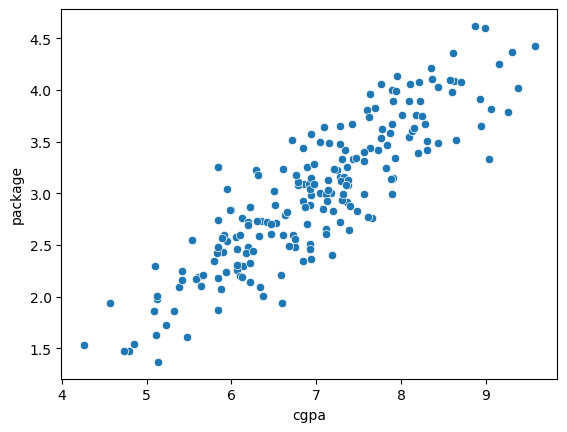

In [27]:
sns.scatterplot(x = "cgpa",y = "package",data = df7)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

#### Change the values of cv to get the accuracy, You can give manually or using kfold,leavePout etc

In [32]:
a = cross_val_score(LinearRegression(),x,y,cv=KFold(n_splits=10))

In [34]:
a.sort()
a*100

array([60.48000765, 65.67540106, 67.20523867, 69.890411  , 73.50599138,
       74.37616704, 80.3181025 , 82.0986355 , 82.64799643, 83.96333567])